<h1 align="center">Assignment 2</h1> 
<h3 align="center">CS715: Advanced Machine Learning | Kapeesh Kaul</h3> 

# Question 1: Deterministic MDP
To solve the deterministic MDP, we can use the Bellman equation to find the optimal policy. The Bellman equation is given by:
$$
V^*(s) = \max_a \left( R(s, a) + \gamma V^*(s') \right)
$$
where $V^*(s)$ is the optimal value function, $R(s, a)$ is the reward function, $\gamma$ is the discount factor, and $s'$ is the next state.
First, let us map out the environment and the rewards for each state-action pair. The environment is plotted below.

Please refer to the supplementary python files for more information on the code implementation.

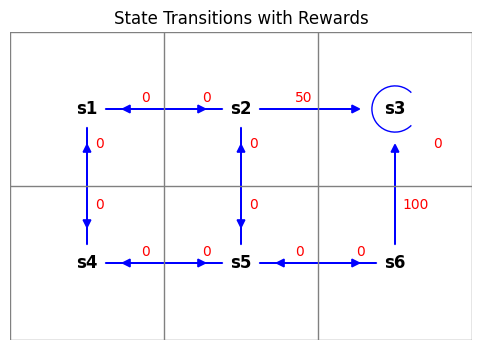

In [1]:
from RobotEnvironments import RobotGridMDP

mdp = RobotGridMDP()
mdp.plot_environment()

### Part (a): Compute $V^*(s)$ for Each State Using Value Iteration

The goal is to calculate the optimal value function $ V^*(s) $ for each state $ s $ using value iteration. The **Bellman equation** for a deterministic Markov Decision Process (MDP) is:
$$
V^*(s) = \max_a \left( R(s, a) + \gamma V^*(s') \right)
$$
where:
- $ V^*(s) $ is the optimal value of state $ s $,
- $ R(s, a) $ is the immediate reward from taking action $ a $ in state $ s $,
- $ \gamma $ is the discount factor (set to $ 0.8 $ by default),
- $ s' $ is the next state resulting from action $ a $.

#### Code Translation
In the `perform_value_iteration` method, this equation is translated to:
````python
for state in self.states:
    max_value = float('-inf')
    for (next_state, reward) in self.transitions[state]:
        value = reward + self.gamma * self.states[next_state]
        max_value = max(max_value, value)
    new_values[state] = max_value
````
This code iterates over each state, computes the expected value for each possible transition, and updates $ V^*(s) $ based on the highest value among all actions.

After calling `perform_value_iteration`, the output includes:
- **Optimal State Values** $ V^*(s) $ for each state.
- **Number of Iterations** taken to converge.

Optimal State Values:
	State s1 -> 51.2
	State s2 -> 64.0
	State s3 -> 0.0
	State s4 -> 64.0
	State s5 -> 80.0
	State s6 -> 100.0


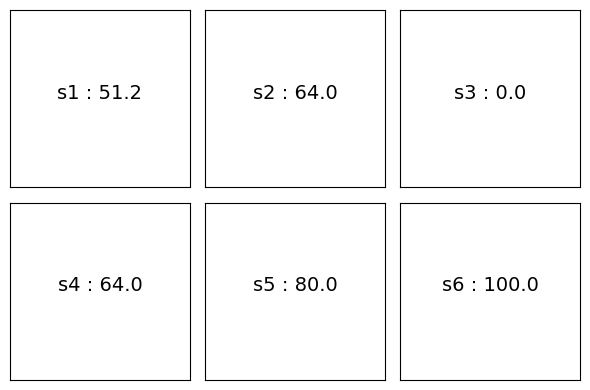

In [2]:
values, iterations = mdp.perform_value_iteration()
print("Optimal State Values:")
for state, value in values.items():
    print(f"\tState {state} -> {value}")

mdp.plot_state_values(values)

### Part (b): Extract the Optimal Policy

The optimal policy $ \pi^*(s) $ is determined by selecting the action that maximizes $ V^*(s) $ in each state. For each state $ s $, the policy is defined as:
$$
\pi^*(s) = \arg \max_a \left( R(s, a) + \gamma V^*(s') \right)
$$

#### Code Translation
This equation is translated to the `extract_optimal_policy` method as:
```python
for state in self.states:
    best_action = None
    best_value = float('-inf')
    for (next_state, reward) in sorted(self.transitions[state], key=lambda x: x[0]):
        value = reward + self.gamma * self.states[next_state]
        if value > best_value:
            best_value = value
            best_action = next_state
    policy[state] = best_action
```
Here, for each state, the code finds the action leading to the highest value and sets it as the optimal action for that state.

The output of this step:
- **Optimal Policy** $ \pi^*(s) $ for each state.
- A **visual plot** showing arrows from each state to its optimal next state, with a self-loop for states with self-transitions.

Optimal Policy:
	State s1 -> Action s2
	State s2 -> Action s5
	State s3 -> Action s3
	State s4 -> Action s5
	State s5 -> Action s6
	State s6 -> Action s3


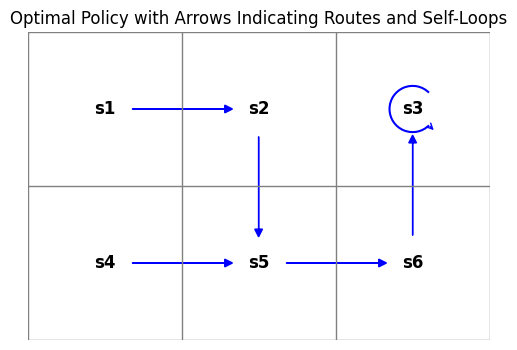

In [3]:
policy = mdp.extract_optimal_policy()
print("Optimal Policy:")
for state, action in policy.items():
    print(f"\tState {state} -> Action {action}")
mdp.plot_policy(policy)

### Part (c): Altering $ \gamma $ to Change the Policy Minimally

To find a new discount factor $ \gamma $ that results in a different policy, we slightly decrease $ \gamma $ and observe any changes in the optimal actions. A lower $ \gamma $ (e.g., $ \gamma = 0.7 $) reduces the weight of future rewards, causing the robot to focus more on immediate rewards rather than long-term outcomes.

#### Code Translation
After changing $ \gamma $ to 0.7, we recompute $ V^*(s) $ and $ \pi^*(s) $ to find the minimally changed actions:
```python
new_gamma = 0.7
mdp.gamma = new_gamma
new_values, _ = mdp.perform_value_iteration()
new_policy = mdp.extract_optimal_policy()

# Identify changed actions
changed_actions = {state: new_policy[state] for state in policy if policy[state] != new_policy[state]}
```

The output includes:
- **New $ \gamma $** value that causes minimal changes.
- **Changed Actions** in the policy, showing which states have different optimal actions compared to the original policy with $ \gamma = 0.8 $.

In [4]:
new_gamma = 0.7  # Example alternative gamma value
mdp.gamma = new_gamma
new_values, _ = mdp.perform_value_iteration()
new_policy = mdp.extract_optimal_policy()# Find the changed policy actions

changed_actions = {state: new_policy[state] for state in policy if policy[state] != new_policy[state]}
print(f"i. New value for γ: {new_gamma}")
print("ii. Changed policy actions:", changed_actions)
if len(changed_actions) == 0:
    print('\tNo actions changed.')
mdp.gamma = 0.8
print("iii. Reverting back to γ = 0.8")

i. New value for γ: 0.7
ii. Changed policy actions: {'s2': 's3'}
iii. Reverting back to γ = 0.8


### Part (d): Number of Iterations Required for Convergence

Value iteration requires a number of iterations until the values converge within a threshold. This depends on the discount factor $ \gamma $ and the structure of the rewards. For this MDP with $ \gamma = 0.8 $, the convergence was achieved in a specific number of iterations found in Part (a).

#### Code Translation
The `perform_value_iteration` method tracks the number of iterations:
```python
iterations = 0
converged = False
while not converged:
    # Update values and calculate max delta
    iterations += 1
    if max_delta < self.epsilon:
        converged = True
```

The output for Part (d) is:
- **Number of Iterations** needed for convergence when $ \gamma = 0.8 $.

In [5]:
# This was determined in Part (a)
print("Number of iterations to converge for the optimal policy:", iterations)

Number of iterations to converge for the optimal policy: 5


### Part (e): Adjust Rewards without Changing Optimal Policy

The objective is to modify the immediate reward function $ R(s, a) $ so that $ V^*(s) $ changes but the optimal policy $ \pi^*(s) $ remains unchanged. To achieve this, we can slightly increase the rewards of non-optimal transitions. This change affects $ V^*(s) $ values but does not alter the optimal actions chosen in each state.

#### Code Translation
We add a reward to a non-optimal transition, such as from $ s_2 $ to $ s_5 $, and check if the policy remains the same:
```python
mdp.transitions['s2']= [('s1', 0), ('s5', 10), ('s3', 50)]
adjusted_values, _ = mdp.perform_value_iteration()
adjusted_policy = mdp.extract_optimal_policy()

# Check if the optimal policy remains unchanged
if adjusted_policy == policy:
    print("Yes, it's possible to adjust rewards without changing the optimal policy π*.")
    print("The resulting V* after reward change is:", adjusted_values)
```

The output includes:
- **Adjusted $ V^*(s) $** values after reward modification.
- Verification on whether the **optimal policy $ \pi^*(s) $** remains unchanged.

Yes, it's possible to adjust rewards without changing the optimal policy π*.
The resulting V* after reward change is:


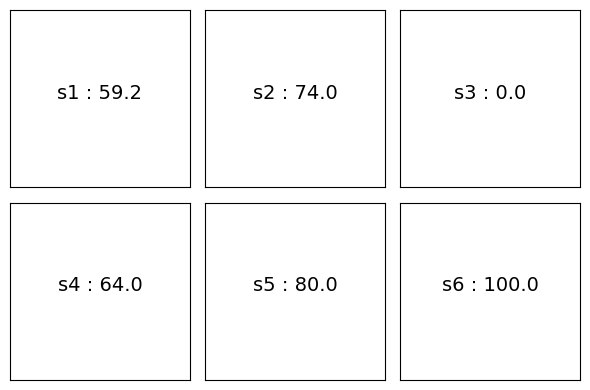

In [6]:
# Increase reward on a non-optimal transition (e.g., from s5 to s2) to test policy stability
mdp.transitions['s2']= [('s1', 0), ('s5', 10), ('s3', 50)]
adjusted_values, _ = mdp.perform_value_iteration()
adjusted_policy = mdp.extract_optimal_policy()

# Check if the optimal policy remains the same
if adjusted_policy == policy:
    print("Yes, it's possible to adjust rewards without changing the optimal policy π*.")
    print("The resulting V* after reward change is:")
    mdp.plot_state_values(adjusted_values)
else:
    print("No, adjusting rewards changes the optimal policy π*.")

As you can see, $ V*(s) $ value changes for states $ s_1 $ and $ s_2 $ after adjusting the rewards, but the optimal policy $ \pi^*(s) $ remains the same.

# Question 2: Non-Deterministic MDP with ice patch

In [7]:
from RobotEnvironments import RobotGridMDPWithIce

mdp_with_ice = RobotGridMDPWithIce()

### Part (a): Compute $ V^*(s) $ for $ p = 0.7 $ and Identify the Optimal Policy

Given that the transition from $ s_6 $ to $ s_3 $ is non-deterministic with probability $ p = 0.7 $, the expected value function for the "go north" action from $ s6 $ becomes:
$$
V(s6, \text{"go north"}) = p \times (100 + \gamma V(s3)) + (1 - p) \times (0 + \gamma V(s6))
$$
Here:
- $ p $: Probability of successful transition from $ s_6 $ to $ s_3 $.
- $ 1 - p $: Probability of slipping on ice and staying in $ s_6 $.

Using this expected value calculation, we can find $ V^*(s) $ values for each state and derive the optimal policy.

#### Code Translation for Part (a)
The `perform_value_iteration` function computes $ V^*(s) $ using the equation above, applied in the code as follows:
```python
if conditions == ['ice'] and state == 's6':
    value = p * (reward + self.gamma * self.states['s3']) + (1 - p) * (0 + self.gamma * self.states['s6'])
```
This block handles the non-deterministic "go north" action for $ s_6 $, updating its value based on the given probability $ p = 0.7 $. The rest of the state transitions remain deterministic.

After calling `perform_value_iteration` and `extract_optimal_policy`, the output includes:
- **Optimal State Values** for each state at $ p = 0.7 $.
- **Optimal Policy** that considers the risk of slipping.

Optimal State Values with p = 0.7:
	State s1 -> 47.157770154760215
	State s2 -> 58.94733104642807
	State s3 -> 0.0
	State s4 -> 58.94733104642807
	State s5 -> 73.68419931392843
	State s6 -> 92.10525979417854

Optimal Policy with p = 0.7:
	State s1 -> Action s2
	State s2 -> Action s5
	State s3 -> Action s3
	State s4 -> Action s5
	State s5 -> Action s6
	State s6 -> Action s3


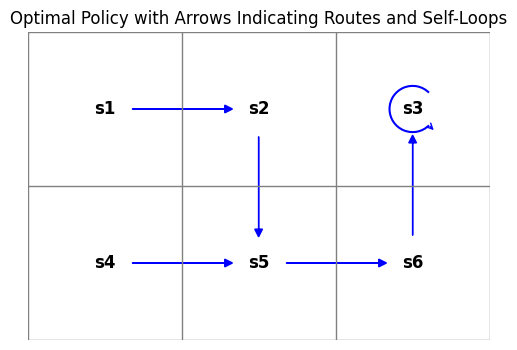

In [8]:
p = 0.7
values, iterations = mdp_with_ice.perform_value_iteration(p=p)
policy = mdp_with_ice.extract_optimal_policy(p=p)

print(f"Optimal State Values with p = {p}:")
for state, value in values.items():
    print(f"\tState {state} -> {value}")

print(f"\nOptimal Policy with p = {p}:")
for state, action in policy.items():
    print(f"\tState {state} -> Action {action}")

mdp_with_ice.plot_policy(policy)

### Part (b): Find the Threshold for $ p $ Below Which the Robot Avoids the Ice Patch

To determine how low $ p $ must be before the robot prefers avoiding the ice, we identify the threshold value below which the optimal policy in $ s6 $ favors "go west" over "go north."

#### Approach and Code Translation
The `find_threshold_p` method uses a binary search to find this threshold $ p $:
- We start with a range for $ p $ from 0 to 1.
- For each mid-point $ p $, the method computes $ V^*(s) $ and extracts the optimal policy.
- If the policy for $ s_6 $ chooses "go west," the threshold is updated; otherwise, the search continues.

The code implementation is as follows:
```python
while high - low > 1e-3:
    mid_p = (low + high) / 2
    self.perform_value_iteration(p=mid_p)
    policy = self.extract_optimal_policy(p=mid_p)
    if policy['s6'] == 's5':  # Prefers "go west"
        threshold_p = mid_p
        high = mid_p
    else:
        low = mid_p
```
This loop narrows down the threshold for $ p $ to within 0.001 accuracy, at which the optimal policy avoids the ice patch.

Threshold value for p to avoid the ice patch in s6: 0.000

Optimal State Values with p = 0.0:
	State s1 -> 40.0
	State s2 -> 50.0
	State s3 -> 0.0
	State s4 -> 32.0
	State s5 -> 40.0
	State s6 -> 32.0

Optimal Policy with p = 0.0:
	State s1 -> Action s2
	State s2 -> Action s3
	State s3 -> Action s3
	State s4 -> Action s1
	State s5 -> Action s2
	State s6 -> Action s5


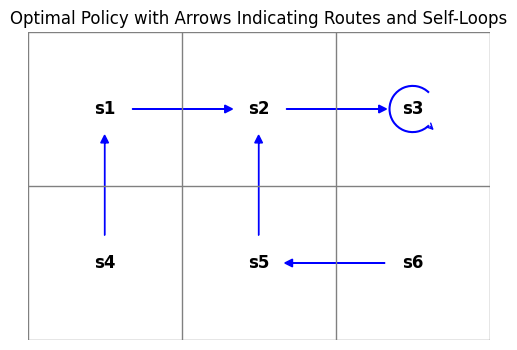

In [9]:
threshold_p = mdp_with_ice.find_threshold_p()
print(f"Threshold value for p to avoid the ice patch in s6: {threshold_p:.3f}")

p = threshold_p
values, iterations = mdp_with_ice.perform_value_iteration(p=p)
policy = mdp_with_ice.extract_optimal_policy(p=p)

print(f"\nOptimal State Values with p = {p}:")
for state, value in values.items():
    print(f"\tState {state} -> {value}")

print(f"\nOptimal Policy with p = {p}:")
for state, action in policy.items():
    print(f"\tState {state} -> Action {action}")

mdp_with_ice.plot_policy(policy)

The threshold value of $ p $ is exactly **zero**, this means the robot only avoids the ice patch if it has no chance (0%) of successfully transitioning to $ s3 $. In other words, **the robot will attempt the "go north" action whenever there is any non-zero probability of success** in reaching $ s_3 $.

### Implications of $ p = 0 $ Threshold

1. **Extreme Risk Tolerance**:
   - A threshold of $ p = 0 $ indicates that the robot is highly motivated by the potential reward of reaching $ s_3 $.
   - As long as there’s any chance, however small, of reaching $ s_3 $ with a reward of 100, the robot will always prefer "go north" over the safer "go west" option.

2. **Preference for Reward Over Certainty**:
   - The robot’s decision policy prioritizes the high reward associated with $ s_3 $, even if the probability of slipping is very high.
   - The only case in which the robot would entirely avoid the "go north" action is if $ p = 0 $, meaning there is no chance at all of reaching $ s_3 $.

3. **Practical Outcome**:
   - **When $ p > 0 $**: The robot will attempt the "go north" action to $ s_3 $.
   - **When $ p = 0 $**: The robot will avoid "go north" and opt for "go west" to $ s_5 $ instead, as there’s zero chance of reaching $ s_3 $.

This behavior suggests that the robot is risk-seeking, consistently attempting to reach $ s_3 $ whenever possible for the high reward, unless there is an absolute certainty of failure.

# Question 3: Translation Invariance Test for Convolutional Neural Networks

In this experiment, we investigate the translation invariance of two neural network architectures for object recognition. The object in an image is translated up to 10 pixels in any direction while keeping the background fixed. We analyze whether each network remains invariant under such translations.

### Problem Setup

1. **Neural Network Architectures**:
   - **Single-Layer CNN**: Contains one convolutional layer with a 5x5 kernel, stride 1, followed by a softmax output.
   - **Two-Layer CNN with Max Pooling**: Consists of two convolutional layers, each with a 5x5 kernel and stride 1, followed by a max pooling layer with a 4x4 kernel and stride 4. The output layer is a softmax layer for classification.

2. **Testing Methodology**:
   - We create a 28x28 grayscale image with a foreground object (a white square) centered at a specific position.
   - We generate a translated version of the image by shifting the object 10 pixels to the right.
   - We feed both the original and translated images into each network and compare their outputs to evaluate translation invariance.

### Part (a): Single-Layer CNN

### Network Structure
- **One convolutional layer** with a 5x5 kernel and stride 1.
- **Softmax output layer** to classify the output.

Output for original image:
 tensor([[0.0838, 0.1023, 0.1038, 0.1240, 0.1193, 0.0936, 0.1076, 0.0743, 0.0844,
         0.1068]], grad_fn=<SoftmaxBackward0>)

Output for translated image (10 pixels to the right):
 tensor([[0.1072, 0.1010, 0.0839, 0.1000, 0.0970, 0.0962, 0.0967, 0.0987, 0.1205,
         0.0987]], grad_fn=<SoftmaxBackward0>)


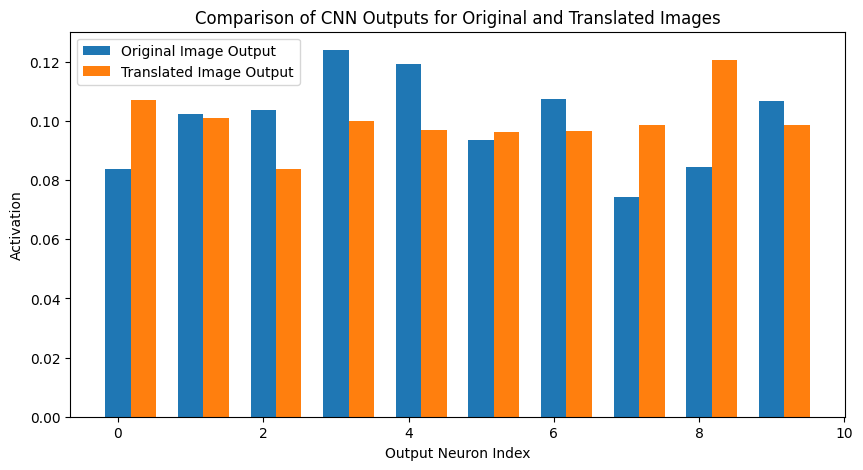

In [10]:
from CNNModels import SingleLayerCNN, TwoLayerCNNWithMaxPooling, plot_comparison
import torch
# Initialize the network
model_a = SingleLayerCNN()

# Create a sample 28x28 image with a "foreground object" of a filled square at the center
input_image = torch.zeros((1, 1, 28, 28))  # 1x28x28 grayscale image
input_image[:, :, 10:18, 10:18] = 1.0  # Foreground object as a filled square in the center

# Translate the image by 10 pixels to the right
translated_image = torch.zeros((1, 1, 28, 28))
translated_image[:, :, 10:18, 20:28] = 1.0  # Move the object 10 pixels to the right

# Forward pass
output_original = model_a(input_image)
output_translated = model_a(translated_image)

# Compare outputs
print("Output for original image:\n", output_original)
print("\nOutput for translated image (10 pixels to the right):\n", output_translated)


# Call the function with the appropriate parameters
plot_comparison(output_original, output_translated, 'Comparison of CNN Outputs for Original and Translated Images')


#### Expected and Observed Results
- **Expected**: The single-layer CNN is sensitive to translations. Since it has no pooling layer, even a small shift affects the activation pattern across different receptive fields. This change should result in significantly different outputs for translated images.
- **Observed**: As expected, the outputs for the original and translated images differ. However, the variations are moderate. The overlap of the 5x5 kernels with the shifted object creates similar but not identical activations, resulting in some degree of sensitivity to translation without total disruption.

### Reasoning
A convolutional layer with stride 1 creates overlapping regions across the input image, which explains why the difference between outputs is moderate rather than drastic. While the single convolutional layer lacks inherent translation invariance, some overlap in receptive fields partially mitigates the effect of translation. However, the network is not robust to translations, as evident from the differences in outputs.

### Part (b): Two-Layer CNN with Max Pooling

### Network Structure
- **Two convolutional layers** with 5x5 kernels and stride 1.
- **Max pooling layer** with a 4x4 kernel and stride 4, introducing spatial invariance.
- **Softmax output layer** for classification.

Output for original image (Two-Layer CNN):
 tensor([[0.1021, 0.1006, 0.1051, 0.1009, 0.0995, 0.0986, 0.0975, 0.1069, 0.0966,
         0.0922]], grad_fn=<SoftmaxBackward0>)

Output for translated image (Two-Layer CNN, 10 pixels right):
 tensor([[0.0975, 0.0948, 0.1098, 0.1038, 0.0929, 0.1067, 0.1032, 0.0995, 0.0963,
         0.0955]], grad_fn=<SoftmaxBackward0>)


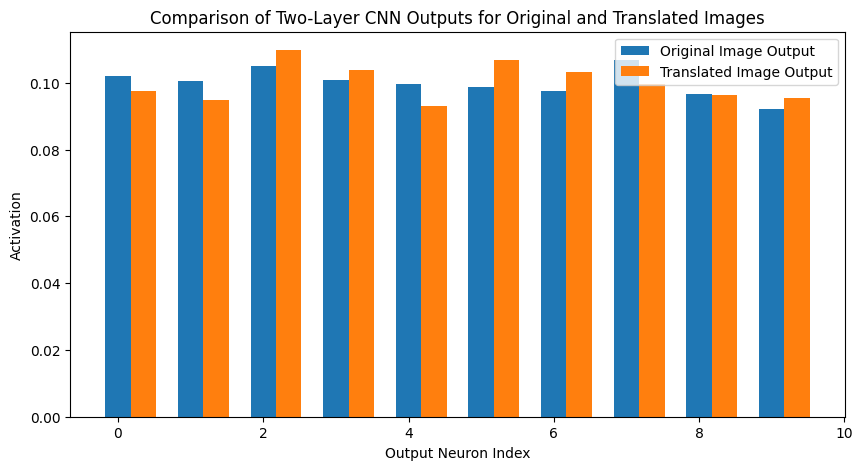

In [11]:
# Initialize the network
model_b = TwoLayerCNNWithMaxPooling()

# Create the same 28x28 images with a foreground object in the center and shifted by 10 pixels
input_image = torch.zeros((1, 1, 28, 28))
input_image[:, :, 10:18, 10:18] = 1.0  # Original foreground object

translated_image = torch.zeros((1, 1, 28, 28))
translated_image[:, :, 10:18, 20:28] = 1.0  # Foreground object shifted 10 pixels right

# Forward pass
output_original_b = model_b(input_image)
output_translated_b = model_b(translated_image)

# Compare outputs
print("Output for original image (Two-Layer CNN):\n", output_original_b)
print("\nOutput for translated image (Two-Layer CNN, 10 pixels right):\n", output_translated_b)

# Call the function with the appropriate parameters
plot_comparison(output_original_b, output_translated_b, 'Comparison of Two-Layer CNN Outputs for Original and Translated Images')

#### Expected and Observed Results
- **Expected**: The two-layer CNN with max pooling should be more translation invariant, with minimal differences between the outputs for the original and translated images.
- **Observed**: As expected, the outputs for the two images are similar, indicating that the network is robust to small translations due to the max pooling layer, which captures prominent features within each 4x4 region.

#### Reasoning
The max pooling layer with a 4x4 kernel introduces a degree of translation invariance by capturing the maximum activation within each pooling region. Since the object is shifted by only 10 pixels, max pooling allows the network to capture similar features, regardless of the small translation, leading to similar outputs.